[View in Colaboratory](https://colab.research.google.com/github/aloksharma9656/unified/blob/master/Final_model.ipynb)

# Program Starts Here

In [0]:
!pip install -q TextBlob
!pip install -q tweepy

In [3]:
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /content/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**Smaller Dataset for Indepth View**

In [4]:
import tweepy
from textblob import TextBlob
from google.colab import files
import csv
import matplotlib.pyplot as plt
import math

#Final sentiments of users
#fin_stm = []
#fin_time = []
fin_plot = {}

# Step 1 - Authenticate
consumer_key= 'RTP5kfuwc0Hd5RMavgD3zWAIN'
consumer_secret= 'mrBJ0UBWZn68oogvpNoCTvLyxP9SrTbdbtyT1kocDz8Bpz6XS4'

access_token='800060045958344704-XvugVHJtGsw2p3CDCzXRqznRzJjYWk1'
access_token_secret='WqmnO5RLU1MgWcV30sFGdL8APqnvgArfNLVN0dl33u9gl'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

#Step 3 - Retrieve Tweets
public_tweets = api.search('cryptocurrency' or 'bitcoin' or 'ripple' or 'iota')

tweetCount = 0

#Step4 - Entering data into a csv file.
with open('livebitcoin.csv', 'w') as csvfile:
    fieldnames = ['Name', 'Total Tweets', 'Favourites_Count', 'Followers', 'User_Verified','User Location',
                 'Date of Tweet', 'Tweet Text', 'Tweet Retweet', 'sentiment', 'fin']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    
    for tweet in public_tweets:
        row = {}
        row['Name'] = (tweet.user.name)
        row['Total Tweets'] = (tweet.user.statuses_count)
        row['Favourites_Count'] = (tweet.user.favourites_count)
        row['Followers'] = (tweet.user.followers_count)
        if tweet.user.verified == True :
          row['User_Verified'] = 1
        else:
          row['User_Verified'] = 0
        #row['User_Verified'] = (tweet.user.verified)
        row['User Location'] = (tweet.user.location)
        row['Date of Tweet'] = (tweet.user.created_at)
        d = TextBlob(tweet.text)
        if d.detect_language() != 'en' :
          row['Tweet Text'] = (d.translate(to='en')) #Translates the tweets if they are not in english.
        else:
          row['Tweet Text'] = d
        
        #sid = SentimentIntensityAnalyzer()

        #ss = sid.polarity_scores(tweet.text)
        #for k in sorted(ss):
          #row['nltk'] = ('{0}: {1}, '.format(k, ss[k]))
          
        row['Tweet Retweet'] = (tweet.retweet_count)
        t = TextBlob(tweet.text)
        row['sentiment'] = t.sentiment.polarity
        #print("hello", max('Total Tweets'))
        p = (0.20 * (1- 1/(1 + tweet.user.statuses_count)) + 0.50 * (1- 1/(1 + tweet.user.favourites_count)) + 0.60 * (1- 1/(1 + tweet.user.followers_count)) + 0.75 * t.sentiment.polarity)/4
        if (t.sentiment.polarity <= 0) and (tweet.user.verified == 0) :
          row['fin'] = max(-(1-p), -(0.75 * p))
        elif (t.sentiment.polarity >= 0) and (tweet.user.verified == 0) :
          row['fin'] = min(1-p, p)
        elif (t.sentiment.polarity <= 0) and (tweet.user.verified == 1) :
          row['fin'] = min(1-p, 0.05 * p)
        elif (t.sentiment.polarity > 0) and (tweet.user.verified == 1) :
          row['fin'] = max(p, 1-p)
          
        #fin_stm.append(row['fin'])
        #fin_time.append(row['Date of Tweet'])
        fin_plot[row['Date of Tweet']] = row['fin']
       
        
        writer.writerow(row)
        
    tweetCount += len(public_tweets)
    print("Downloaded {0} tweets".format(tweetCount))
      
import collections


od = collections.OrderedDict(sorted(fin_plot.items()))    

files.download('livebitcoin.csv')

Downloaded 14 tweets


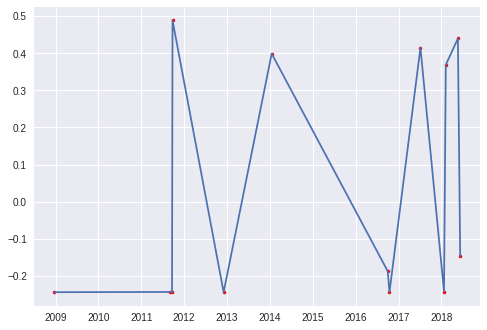

In [5]:
plt.plot(list(fin_plot.keys()), list(fin_plot.values()), 'r.')
plt.plot(list(od.keys()), list(od.values()))

# Importing datasets from twitter from last few years

In [3]:
import tweepy
from textblob import TextBlob
from google.colab import files
import csv
import numpy as np
import matplotlib.pyplot as plt
import math

#Final sentiments of users
fin_plot = {}

print('Do you want to put your manual data (y) or you want to go with twitter database (n) : ')
path = input()
if path == 'y' :
  #Want to try with your own data ? 
  print('Enter Your Name : ')
  name = input()
  print('Enter your total tweets : ')
  total_tweets = int(input())
  print('Enter your total followers : ')
  total_follower = int(input())
  print('Are you a verified user y/n ? : ')
  verified = input()
  print('How much favourite did you get ? : ')
  fav = int(input())
  print('Enter your tweet : ')
  tweet = input()
  tw = TextBlob(tweet)
  p = (0.20 * (1- 1/(1 + total_tweets)) + 0.50 * (1- 1/(1 + fav)) + 0.60 * (1- 1/(1 + total_follower)) + 0.75 * tw.sentiment.polarity)/4
  if (tw.sentiment.polarity <= 0) and (verified == 'n') :
    print(max(-(1-p), -(0.75*p)))
    plt.plot(max(-(1-p), -(0.75*p)) , 'r^')
  elif (tw.sentiment.polarity >= 0) and (verified == 'n') :
    print(min(1-p, p))
    plt.plot(min(1-p, p) , 'r^')
  elif (tw.sentiment.polarity <= 0) and (verified == 'y') :
    print(min(1-p, 0.05 * p))
    plt.plot(min(1-p, 0.05 * p) , 'r^')
  elif (tw.sentiment.polarity > 0) and (verified == 'y') :
    print(max(p, 1-p))
    plt.plot(max(p, 1-p) , 'r^')
          
          
  
  
  
  sid = SentimentIntensityAnalyzer()

  ss = sid.polarity_scores(tweet)
  for k in sorted(ss):
    print('{0}: {1}, '.format(k, ss[k]), end='')
  print()
  
  

else: 
    # Step 1 - Authenticate
  consumer_key= 'RTP5kfuwc0Hd5RMavgD3zWAIN'
  consumer_secret= 'mrBJ0UBWZn68oogvpNoCTvLyxP9SrTbdbtyT1kocDz8Bpz6XS4'

  access_token='800060045958344704-XvugVHJtGsw2p3CDCzXRqznRzJjYWk1'
  access_token_secret='WqmnO5RLU1MgWcV30sFGdL8APqnvgArfNLVN0dl33u9gl'

  auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

  api = tweepy.API(auth, wait_on_rate_limit=True,
           wait_on_rate_limit_notify=True)

  if (not api):
      print ("Can't Authenticate")
      sys.exit(-1)


  searchQuery = ('cryptocurrency' or 'bitcoin' or 'ripple' or 'iota') # this is what we're searching for
  new_tweets = api.search('cryptocurrency' or 'bitcoin' or 'ripple' or 'iota')
  maxTweets = 3000 # Some arbitrary large number
  tweetsPerQry = 100  # this is the max the API permits
  since_date = "2018-01-01"

  # If results from a specific ID onwards are reqd, set since_id to that ID.
  # else default to no lower limit, go as far back as API allows
  sinceId = None

  # If results only below a specific ID are, set max_id to that ID.
  # else default to no upper limit, start from the most recent tweet matching the search query.
  max_id = -1

  tweetCount = 0
  print("Downloading max {0} tweets".format(maxTweets))

  with open('cryptocurrency.csv', 'w') as csvfile:
      fieldnames = ['Name', 'Total Tweets', 'Favourites_Count', 'Followers', 'User_Verified','User Location',
                   'Date of Tweet', 'Tweet Text', 'Tweet Retweet', 'sentiment', 'fin']
      writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
      writer.writeheader()
      while tweetCount < maxTweets:
          for tweet in new_tweets:
              row = {}
              row['Name'] = (tweet.user.name)
              row['Total Tweets'] = (tweet.user.statuses_count)
              row['Favourites_Count'] = (tweet.user.favourites_count)
              row['Followers'] = (tweet.user.followers_count)
              if tweet.user.verified == True :
                row['User_Verified'] = 1
              else:
                row['User_Verified'] = 0
              #row['User_Verified'] = (tweet.user.verified)
              row['User Location'] = (tweet.user.location)
              row['Date of Tweet'] = (tweet.user.created_at)
              #d = TextBlob(tweet.text)
              #if d.detect_language() != 'en' :
              #  row['Tweet Text'] = (d.translate(to='en')) #Translates the tweets if they are not in english.
              #else:
              #  row['Tweet Text'] = d
              row['Tweet Text'] = tweet.text

              row['Tweet Retweet'] = (tweet.retweet_count)
              t = TextBlob(tweet.text)
              row['sentiment'] = t.sentiment.polarity
              #print("hello", max('Total Tweets'))
              p = (0.20 * (1- 1/(1 + tweet.user.statuses_count)) + 0.50 * (1- 1/(1 + tweet.user.favourites_count)) + 0.60 * (1- 1/(1 + tweet.user.followers_count)) + 0.75 * t.sentiment.polarity)/4
              if (t.sentiment.polarity <= 0) and (tweet.user.verified == 0) :
                row['fin'] = max(-(1-p), -(0.75 * p))
              elif (t.sentiment.polarity >= 0) and (tweet.user.verified == 0) :
                row['fin'] = min(1-p, p)
              elif (t.sentiment.polarity <= 0) and (tweet.user.verified == 1) :
                row['fin'] = min(1-p, 0.05 * p)
              elif (t.sentiment.polarity > 0) and (tweet.user.verified == 1) :
                row['fin'] = max(p, 1-p)
              #fin_stm.append(row['fin'])
              #fin_time.append(row['Date of Tweet'])
              fin_plot[row['Date of Tweet']] = row['fin']


              writer.writerow(row)
          tweetCount += len(new_tweets)
          #print("Downloaded {0} tweets".format(tweetCount))
          max_id = new_tweets[-1].id
  print ("Downloaded {0} tweets".format(tweetCount))
  import collections


  od = collections.OrderedDict(sorted(fin_plot.items()))

  #print(od)
  files.download('cryptocurrency.csv')

Do you want to put your manual data (y) or you want to go with twitter database (n) : 
n
Downloaded 3000 tweets


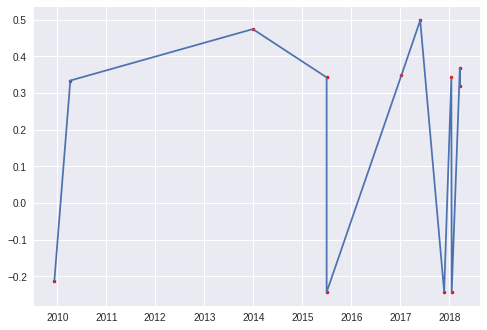

In [4]:
plt.plot(list(fin_plot.keys()), list(fin_plot.values()), 'r.')
plt.plot(list(od.keys()), list(od.values()))